<a href="https://colab.research.google.com/github/saraswathibattagiri06/Spatial-Coordinate-Regression-CNN/blob/main/ML_Assingment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
# Installation (Standard in Colab, but good to show)
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

# Set seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [25]:
def create_pixel_dataset(grid_size=50):
    """
    Creates a dataset of images with one '255' pixel.
    Returns:
        X: (2500, 50, 50, 1) float32 images
        y: (2500, 2) normalized coordinates [x, y]
    """
    X = []
    y = []

    for row in range(grid_size):
        for col in range(grid_size):
            # Create blank 50x50 image
            img = np.zeros((grid_size, grid_size), dtype=np.float32)
            img[row, col] = 255.0  # Set the target pixel

            X.append(img)
            # Coordinates are (column_index, row_index)
            # Normalize to [0, 1] by dividing by (grid_size - 1)
            y.append([col / (grid_size - 1), row / (grid_size - 1)])

    X = np.array(X).reshape(-1, grid_size, grid_size, 1)
    y = np.array(y)
    return X, y

# Generate and split (80% Train, 20% Test)
X, y = create_pixel_dataset()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Dataset generated. Training samples: {len(X_train)}, Testing samples: {len(X_test)}")

Dataset generated. Training samples: 2000, Testing samples: 500


In [26]:
def build_coordinate_regressor():
    model = models.Sequential([
        # Feature Extraction
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),

        # Regression Head
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(2, activation='sigmoid') # Sigmoid ensures output is [0, 1]
    ])

    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

model = build_coordinate_regressor()
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 48, 48, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 22, 22, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,992,258 (15.23 MB)

 Trainable params: 3,992,258 (15.23 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 122ms/step - loss: 0.0505 - mae: 0.1708 - val_loss: 0.0038 - val_mae: 0.0473
Epoch 2/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 135ms/step - loss: 0.0034 - mae: 0.0445 - val_loss: 0.0016 - val_mae: 0.0298
Epoch 3/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 139ms/step - loss: 0.0012 - mae: 0.0266 - val_loss: 8.3534e-04 - val_mae: 0.0223
Epoch 4/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 123ms/step - loss: 6.2981e-04 - mae: 0.0188 - val_loss: 6.7243e-04 - val_mae: 0.0204
Epoch 5/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 124ms/step - loss: 3.9311e-04 - mae: 0.0151 - val_loss: 4.9844e-04 - val_mae: 0.0176
Epoch 6/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 141ms/step - loss: 3.5904e-04 - mae: 0.0142 - val_loss: 6.3633e-04 - val_mae: 0.0198
Epoch 7/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 140ms/step - loss: 3.7227e-04 - mae: 0.0145 - val_loss: 7.6674e-04 - val_mae: 0.0220
Epoch 8/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 123ms/step - loss: 5.1470e-04 - mae: 0.0170 - val_loss: 9.0445e-04 - val_mae: 0.0230
Epoch 9/1

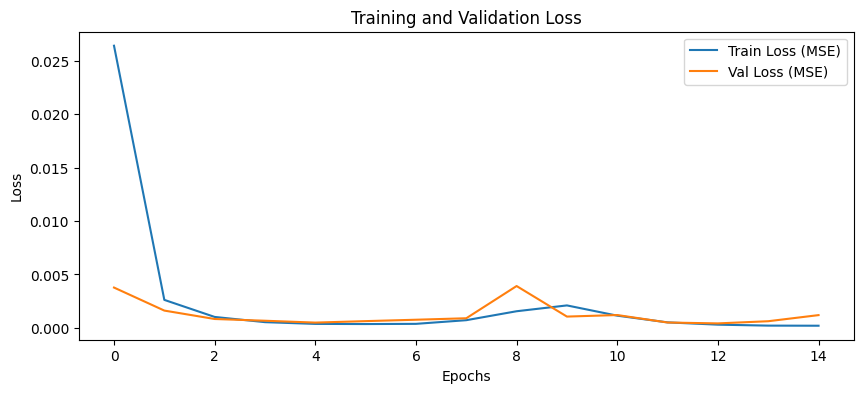

In [27]:
# Train the model
history = model.fit(
    X_train, y_train,
    epochs=15,
    batch_size=32,
    validation_data=(X_test, y_test)
)

# Graphing the Training Logs
plt.figure(figsize=(10, 4))
plt.plot(history.history['loss'], label='Train Loss (MSE)')
plt.plot(history.history['val_loss'], label='Val Loss (MSE)')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


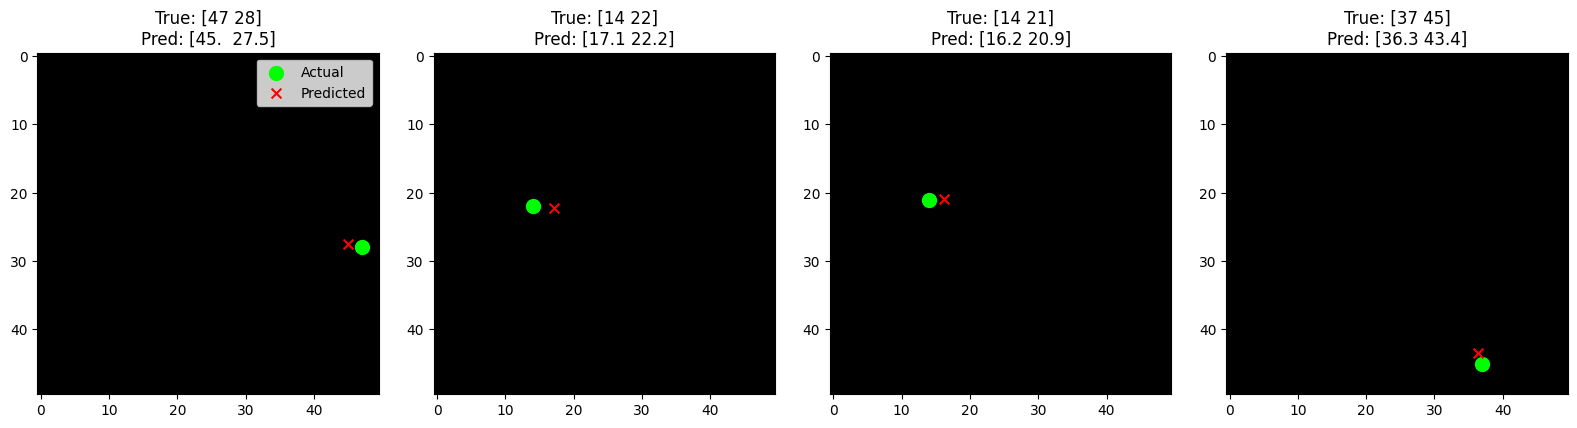

In [28]:
def visualize_predictions(model, X_samples, y_true_norm):
    predictions_norm = model.predict(X_samples)

    # Denormalize for plotting (scale back to 0-49)
    y_true = y_true_norm * 49
    y_pred = predictions_norm * 49

    plt.figure(figsize=(16, 4))
    for i in range(4):
        plt.subplot(1, 4, i+1)
        plt.imshow(X_samples[i].reshape(50, 50), cmap='gray')

        # Plot markers
        plt.scatter(y_true[i][0], y_true[i][1], color='lime', s=100, label='Actual', marker='o')
        plt.scatter(y_pred[i][0], y_pred[i][1], color='red', s=50, label='Predicted', marker='x')

        plt.title(f"True: {y_true[i].astype(int)}\nPred: {y_pred[i].round(1)}")
        if i == 0: plt.legend()
    plt.tight_layout()
    plt.show()

visualize_predictions(model, X_test[:4], y_test[:4])